# Decoding Body Language with MediaPipe

## Data Collection and Preparation

### Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Read the Collected Data

In [2]:
df = pd.read_csv('/Users/snehavinothkumar/VS Code/AI_Body_Language_Detector/Dataset/coords.csv')
column_names = ['class'] + [f'column_{i}' for i in range(1,len(df.columns))]
df.columns = column_names

In [3]:
print(df.head())
print(df.tail())

   class  column_1  column_2  column_3  column_4  column_5  column_6  \
0  Happy  0.502649  0.576104 -0.954644  0.999520  0.522585  0.504460   
1  Happy  0.502332  0.576614 -0.971868  0.999475  0.522869  0.505447   
2  Happy  0.501976  0.576764 -0.970228  0.999449  0.523090  0.506141   
3  Happy  0.501356  0.576744 -0.968692  0.999449  0.523167  0.506666   
4  Happy  0.501276  0.577236 -0.963410  0.999442  0.523509  0.508068   

   column_7  column_8  column_9  ...  column_1995  column_1996  column_1997  \
0 -0.901327  0.998642  0.537913  ...     0.001765          0.0     0.558403   
1 -0.919603  0.998511  0.538094  ...    -0.001878          0.0     0.558888   
2 -0.917503  0.998430  0.538205  ...    -0.002567          0.0     0.558655   
3 -0.916380  0.998429  0.538266  ...    -0.002039          0.0     0.558780   
4 -0.911292  0.998407  0.538552  ...    -0.001788          0.0     0.558947   

   column_1998  column_1999  column_2000  column_2001  column_2002  \
0     0.506414     0.0

## Exploratory Data Analysis

### Descriptive Analysis

In [4]:
print(df.info())
print()
print(df.shape)
print()
print(df.describe) #Irrelevant to Study

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Columns: 2005 entries, class to column_2004
dtypes: float64(2004), object(1)
memory usage: 13.9+ MB
None

(911, 2005)

<bound method NDFrame.describe of      class  column_1  column_2  column_3  column_4  column_5  column_6  \
0    Happy  0.502649  0.576104 -0.954644  0.999520  0.522585  0.504460   
1    Happy  0.502332  0.576614 -0.971868  0.999475  0.522869  0.505447   
2    Happy  0.501976  0.576764 -0.970228  0.999449  0.523090  0.506141   
3    Happy  0.501356  0.576744 -0.968692  0.999449  0.523167  0.506666   
4    Happy  0.501276  0.577236 -0.963410  0.999442  0.523509  0.508068   
..     ...       ...       ...       ...       ...       ...       ...   
906  Fight  0.479267  0.667088 -0.924598  0.999997  0.502316  0.589957   
907  Fight  0.483489  0.666870 -0.689664  0.999996  0.507360  0.588808   
908  Fight  0.485433  0.651903 -0.773182  0.999994  0.508685  0.572377   
909  Fight  0.486177  0.651478 -0.8

### Data Preparation

In [5]:
X = df.drop('class', axis=1)
y = df['class']

### Visual Analysis

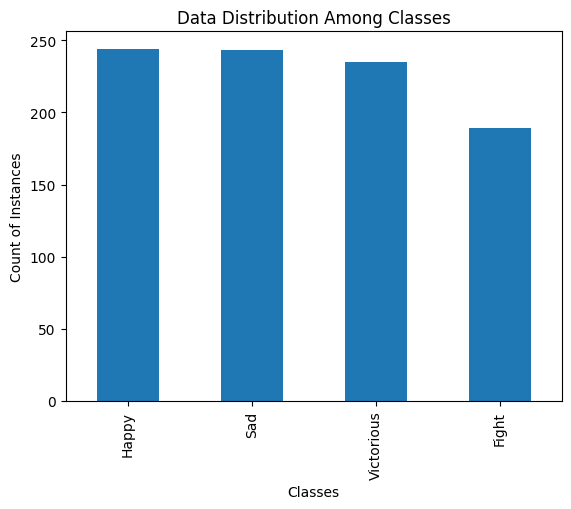

In [6]:
plot = y.value_counts().plot(kind = 'bar')
plt.title("Data Distribution Among Classes")
plt.xlabel("Classes")
plt.ylabel("Count of Instances")
plt.show()

In [7]:
df['class'].value_counts()

class
Happy         244
Sad           243
Victorious    235
Fight         189
Name: count, dtype: int64

### Split into Training Data & Testing Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Handle Imbalanced Data

In [9]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_resample(X_train, y_train)

## Build Model

### Import Necessary Libraries

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

### Design a Pipeline

In [11]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier())
}

### Train the Models

In [12]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

## Deploy Model

### Import Necessary Libraries

In [13]:
from sklearn.metrics import accuracy_score #Accuracy metrics
import pickle

### Evaluate the Models

In [14]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    print(f"{algo}: Accuracy = {acc}")


lr: Accuracy = 1.0
rc: Accuracy = 1.0
rf: Accuracy = 1.0
gb: Accuracy = 1.0


### Save the Model

In [15]:
with open('/Users/snehavinothkumar/VS Code/AI_Body_Language_Detector/Model/body_language.pkl', 'wb') as file:
    pickle.dump(fit_models['gb'],file)
    